# **Quiz de Análisis Exploratorio de Datos (AED) -Dataset de Pingüinos-**

## **Introducción**
El dataset de pingüinos de Palmer Station Antarctica LTER es un conjunto de datos ampliamente utilizado en análisis de datos y aprendizaje automático. Contiene información sobre tres especies de pingüinos (Adelie, Chinstrap y Gentoo) recolectada en tres islas diferentes de la Antártida. Incluye variables como el tamaño del pico, la longitud de las aletas y la masa corporal, lo que lo convierte en un excelente recurso para explorar tendencias, relaciones y patrones en los datos.

En este taller, llevarán a cabo un Análisis Exploratorio de Datos (AED) para responder preguntas clave y visualizar la información de manera efectiva.

---

## **Objetivo**
Aplicar técnicas de exploración de datos utilizando Python para responder preguntas concretas sobre el dataset de pingüinos y representar los hallazgos mediante visualizaciones gráficas.

---

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
pinguinos = sns.load_dataset("penguins")
pinguinos.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## **Preguntas para el Análisis Exploratorio de Datos**
1. ¿Cuántos pingüinos de cada especie hay en el dataset? Representa los resultados en un gráfico de barras.

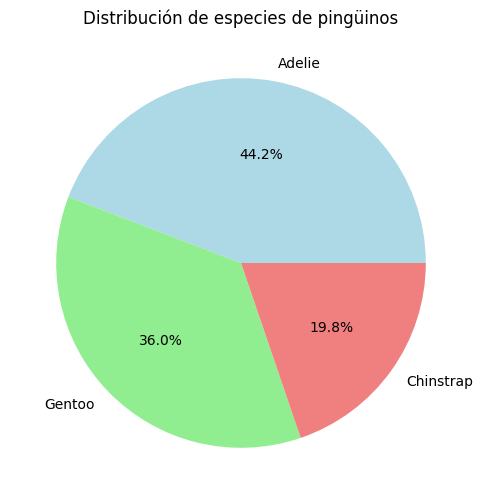

In [5]:
species_counts = pinguinos['species'].value_counts()
species_counts.plot.pie(autopct='%1.1f%%', labels=species_counts.index, figsize=(6,6), colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribución de especies de pingüinos')
plt.ylabel('')  
plt.show()

2. ¿Cuál es la distribución de pingüinos en cada isla? ¿Existe alguna especie predominante en cada isla? Visualiza la información en un gráfico de barras o pastel.

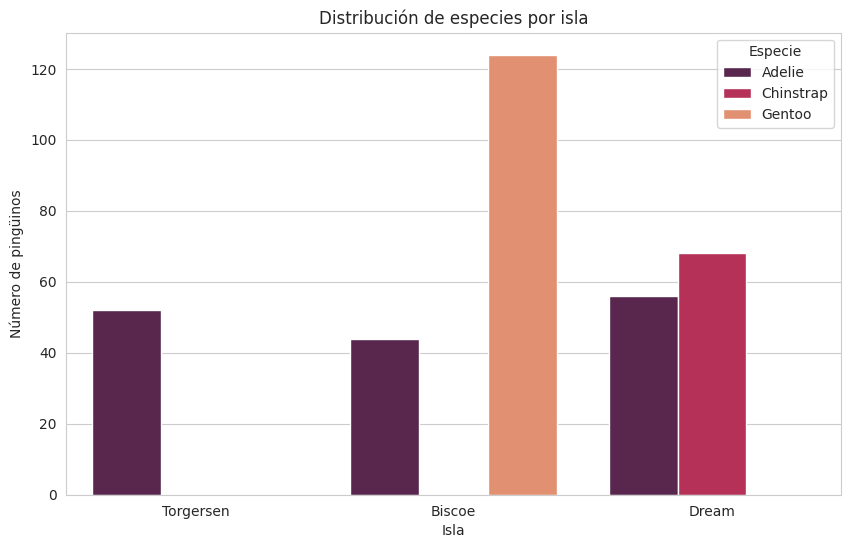

In [7]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.countplot(data=pinguinos, x='island', hue='species', palette='rocket')

plt.title('Distribución de especies por isla')
plt.xlabel('Isla')
plt.ylabel('Número de pingüinos')
plt.legend(title='Especie')
plt.show()

3. ¿Hay valores nulos en el dataset? ¿Cómo podrían manejarse para evitar sesgos en el análisis? Representa los valores nulos en un mapa de calor.

In [9]:
pinguinos.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

En el caso de los valores cuantitativos podemos borrar esos 2 pinguinos que casi no tienen datos. En la categoría de "sexo" podemos llenar los faltantes con la moda. No lo voy a ejecutar porque se me borra el gráfico 

In [ ]:
"""
# Imputar con media
pinguinos['body_mass_g'] = pinguinos['body_mass_g'].fillna(pinguinos['body_mass_g'].mean())
pinguinos['flipper_length_mm'] = pinguinos['flipper_length_mm'].fillna(pinguinos['flipper_length_mm'].mean())
pinguinos['bill_length_mm'] = pinguinos['bill_length_mm'].fillna(pinguinos['bill_length_mm'].mean())
pinguinos['bill_depth_mm'] = pinguinos['bill_depth_mm'].fillna(pinguinos['bill_depth_mm'].mean())
# Imputar con el valor más frecuente
pinguinos['sex'] = pinguinos['sex'].fillna(pinguinos['sex'].mode()[0])
"""

"\n# Forma recomendada para imputar valores nulos\npinguinos['body_mass_g'] = pinguinos['body_mass_g'].fillna(pinguinos['body_mass_g'].mean())\npinguinos['flipper_length_mm'] = pinguinos['flipper_length_mm'].fillna(pinguinos['flipper_length_mm'].mean())\npinguinos['bill_length_mm'] = pinguinos['bill_length_mm'].fillna(pinguinos['bill_length_mm'].mean())\npinguinos['bill_depth_mm'] = pinguinos['bill_depth_mm'].fillna(pinguinos['bill_depth_mm'].mean())\n# Imputar con el valor más frecuente\npinguinos['sex'] = pinguinos['sex'].fillna(pinguinos['sex'].mode()[0])\n"

Text(95.72222222222221, 0.5, 'Pingüinos')

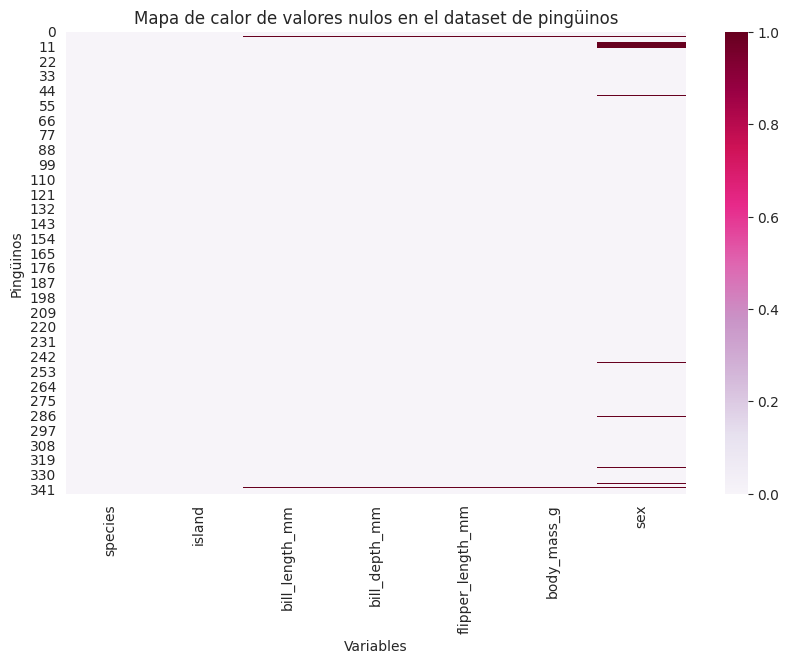

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(pinguinos.isnull(), cmap="PuRd")
plt.title('Mapa de calor de valores nulos en el dataset de pingüinos')
plt.xlabel('Variables')
plt.ylabel('Pingüinos')

4. ¿Cómo varía la masa corporal entre las diferentes especies? Utiliza un gráfico de violín o de cajas para comparar las distribuciones.

/tmp/ipykernel_2987/3209223114.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=pinguinos, x='species', y='body_mass_g', palette='rocket', ax=axes[0])
/tmp/ipykernel_2987/3209223114.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pinguinos, x='species', y='body_mass_g', palette='rocket', ax=axes[1])


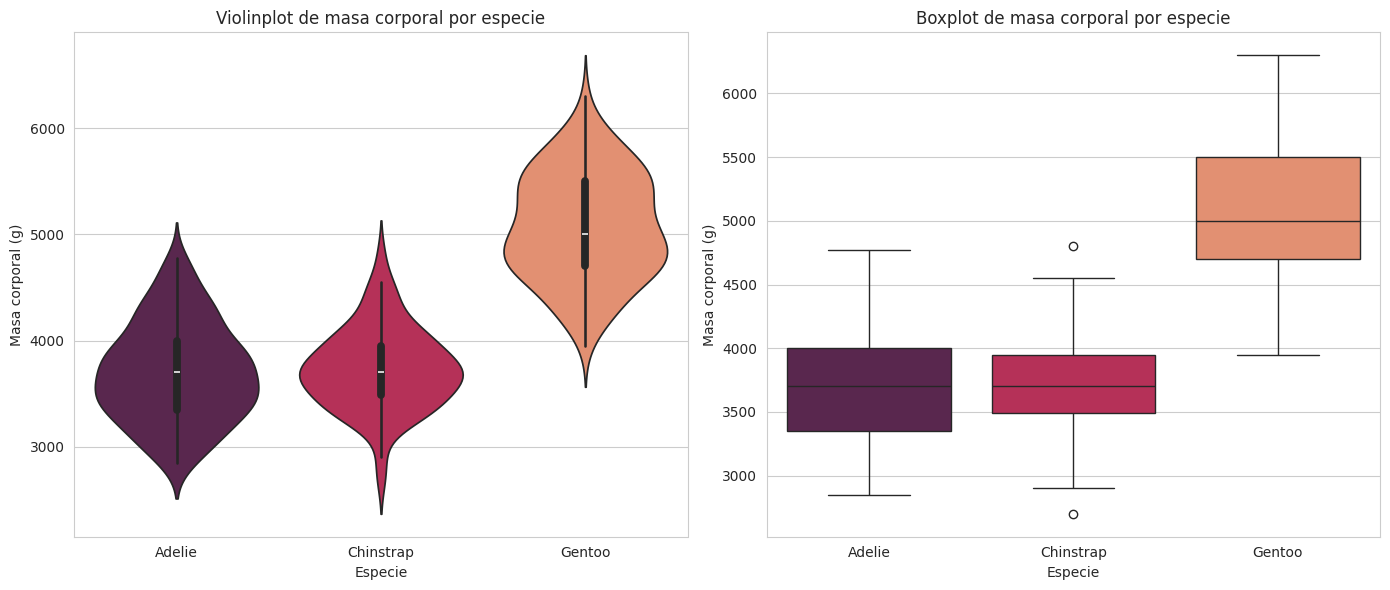

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Violinplot
sns.violinplot(data=pinguinos, x='species', y='body_mass_g', palette='rocket', ax=axes[0])
axes[0].set_title('Violinplot de masa corporal por especie')
axes[0].set_xlabel('Especie')
axes[0].set_ylabel('Masa corporal (g)')

# Boxplot
sns.boxplot(data=pinguinos, x='species', y='body_mass_g', palette='rocket', ax=axes[1])
axes[1].set_title('Boxplot de masa corporal por especie')
axes[1].set_xlabel('Especie')
axes[1].set_ylabel('Masa corporal (g)')

plt.tight_layout()
plt.show()

Los pinguinos Gentoo tienen mayor masa corporal comparado con las otras dos especies. Otro punto es que la caja es más ancha por lo que los datos son más variantes.

5. ¿Existe una correlación entre la longitud de la aleta y la masa corporal? Representa la relación en un gráfico de dispersión con una línea de tendencia.

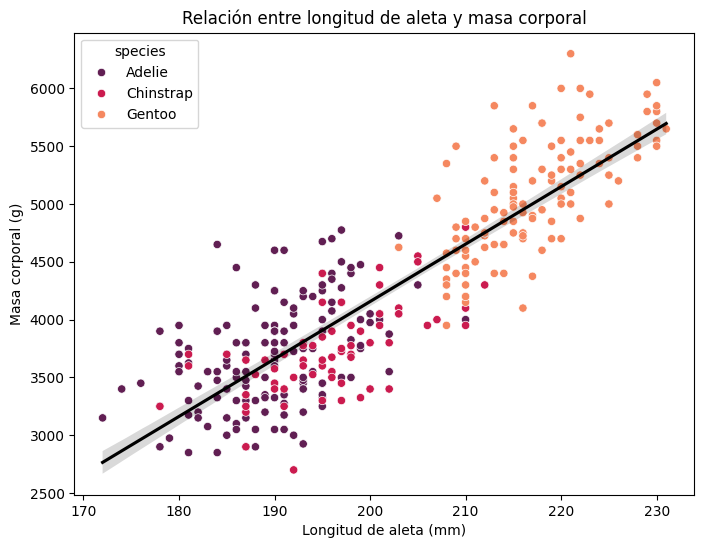

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pinguinos, x='flipper_length_mm', y='body_mass_g', hue='species', palette='rocket')
sns.regplot(data=pinguinos, x='flipper_length_mm', y='body_mass_g', scatter=False, color='black')
plt.title('Relación entre longitud de aleta y masa corporal')
plt.xlabel('Longitud de aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.show()

Gentoo y Chinstrap tienen una relación lineal menos variante que Adelie.
Gentoo tiene una relación de masa/longitud más grande. Por lo que se puede inferir que los pinguinos de esa especie son en general más grandes que los demás.

6. ¿Los pingüinos machos y hembras presentan diferencias en la masa corporal? Justifica tu respuesta utilizando un gráfico de cajas.

/tmp/ipykernel_121660/2326722576.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pinguinos, x='sex', y='body_mass_g', palette='rocket')


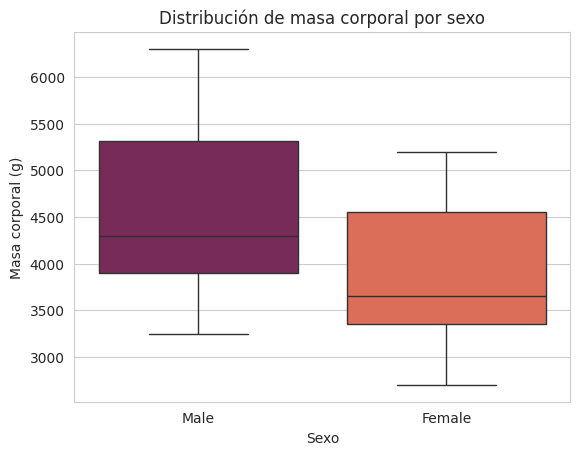

In [29]:
sns.boxplot(data=pinguinos, x='sex', y='body_mass_g', palette='rocket')
plt.title('Distribución de masa corporal por sexo')
plt.xlabel('Sexo')
plt.ylabel('Masa corporal (g)')
plt.show()


Ambos tienen una dispersión similar pero los pinguinos macho tienen más masa corporal. Aunque en ambos hay más dispersion en valores más alto que la media. 

7. ¿Cuál de las tres especies tiene los picos más largos? Representa la distribución de esta variable con un histograma o un gráfico de cajas.

/tmp/ipykernel_2987/3220783305.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pinguinos, x='species', y='bill_length_mm', palette='rocket', ax=axes[1])


Text(0, 0.5, 'Longitud del pico (mm)')

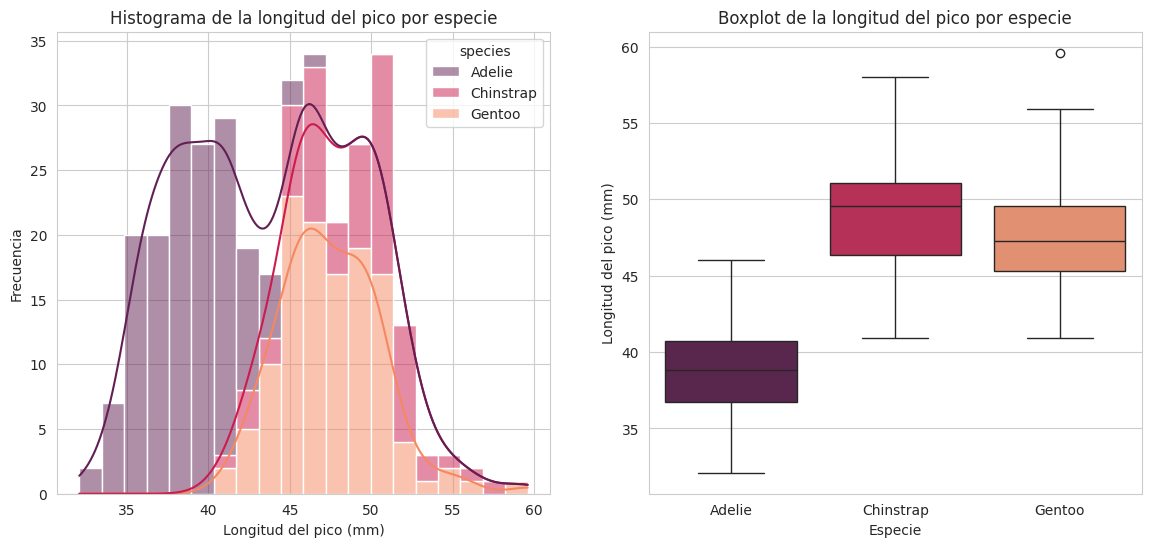

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Histograma de la longitud del pico por especie
sns.histplot(data=pinguinos, x='bill_length_mm', hue='species', bins=20, kde=True, multiple='stack', palette='rocket', ax=axes[0])
axes[0].set_title('Histograma de la longitud del pico por especie')
axes[0].set_xlabel('Longitud del pico (mm)')
axes[0].set_ylabel('Frecuencia')

# Boxplot de la longitud del pico por especie
sns.boxplot(data=pinguinos, x='species', y='bill_length_mm', palette='rocket', ax=axes[1])
axes[1].set_title('Boxplot de la longitud del pico por especie')
axes[1].set_xlabel('Especie')
axes[1].set_ylabel('Longitud del pico (mm)')

Los Chinstrap tienen el pico más largo y los Aledie tienen el pico más corto.

8. ¿Podemos encontrar alguna relación entre la longitud del pico y la profundidad del mismo? Representa la relación en un gráfico de dispersión.

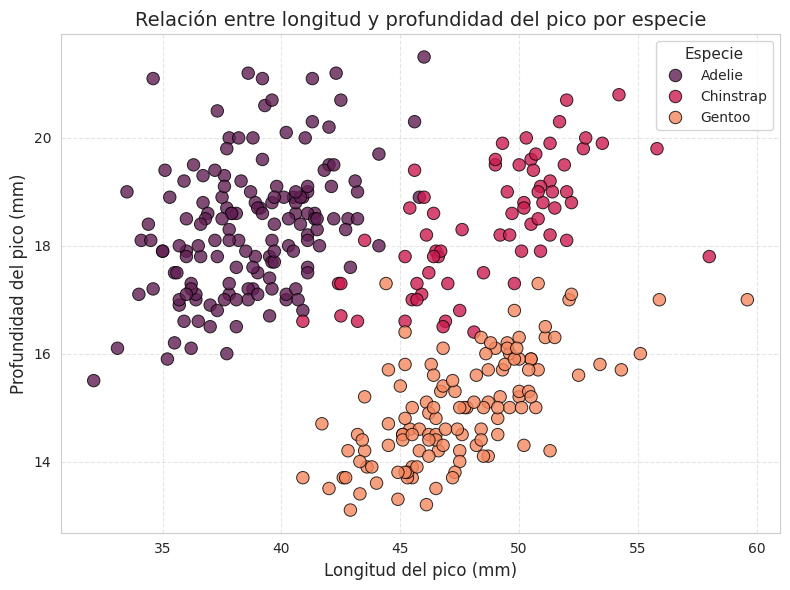

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pinguinos,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    palette="rocket",
    s=80,           # Tamaño de los puntos
    edgecolor="black", # Borde negro para los puntos
    alpha=0.8       # Transparencia
)
plt.title("Relación entre longitud y profundidad del pico por especie", fontsize=14)
plt.xlabel("Longitud del pico (mm)", fontsize=12)
plt.ylabel("Profundidad del pico (mm)", fontsize=12)
plt.legend(title="Especie", fontsize=10, title_fontsize=11, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Adelie: Picos más profundos y cortos
Chinstrap: Picos más profundos y largos
Gentoo: Picos más largos y menos profundos.

9. ¿Cómo podrías identificar posibles valores atípicos en el dataset? Usa un boxplot para detectar valores atípicos en una variable de tu elección.

/tmp/ipykernel_2987/3700378440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pinguinos, x='species', y='flipper_length_mm', palette='rocket')


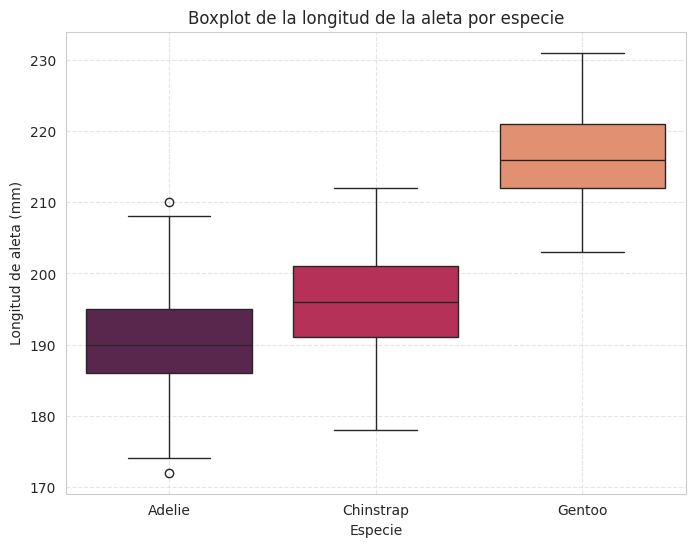

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(data=pinguinos, x='species', y='flipper_length_mm', palette='rocket')
plt.title('Boxplot de la longitud de la aleta por especie')
plt.xlabel('Especie')
plt.ylabel('Longitud de aleta (mm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

10. ¿Qué otro tipo de análisis exploratorio podrías realizar con estos datos para extraer más información? Proponlo y visualízalo mediante gráficos adecuados.

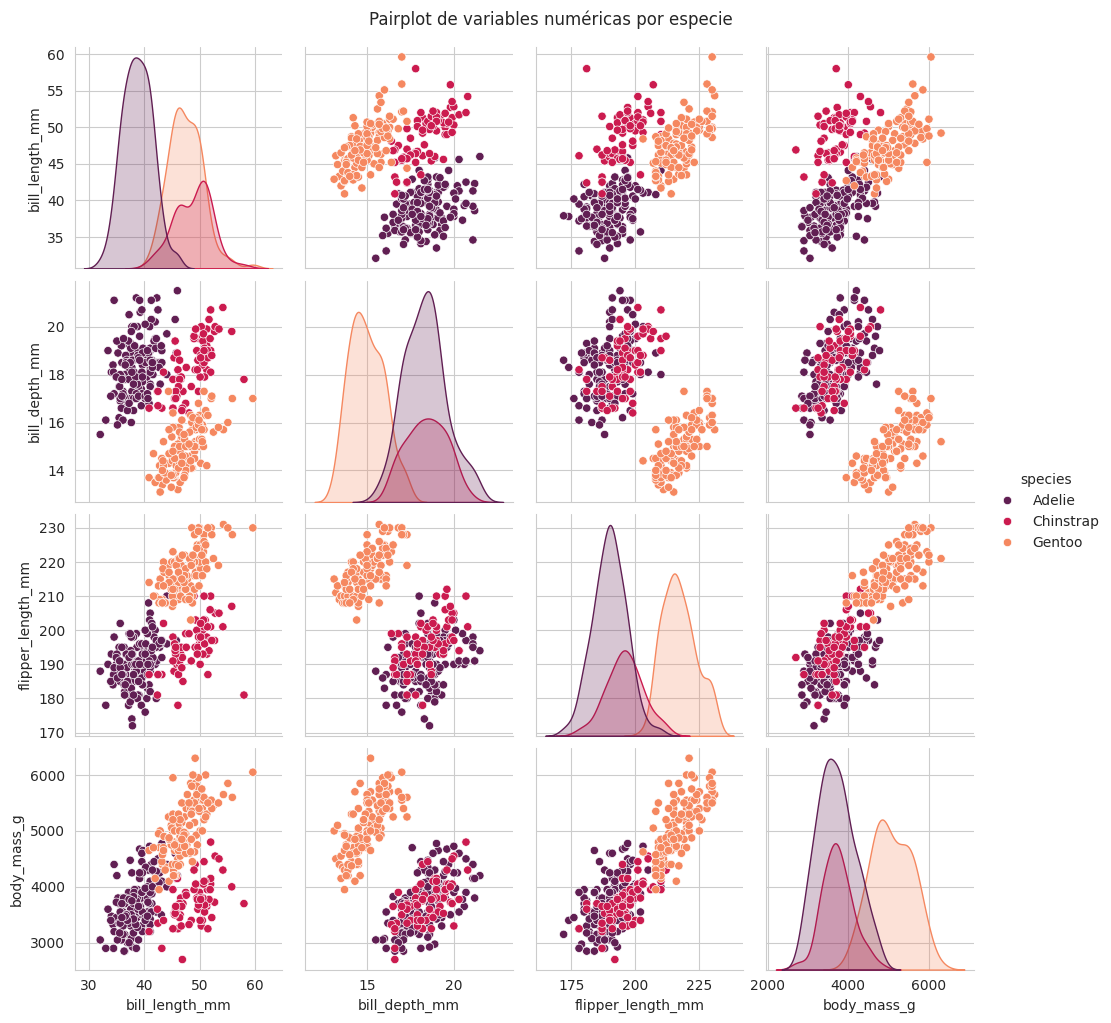

In [50]:
sns.pairplot(pinguinos, hue='species', palette='rocket', diag_kind='kde')
plt.suptitle('Pairplot de variables numéricas por especie', y=1.02)
plt.show()

Podemos notar que Gentoo es una especie un poco más diferente que las otras dos

---

## **Actividad Final**

Responde las siguientes preguntas en un informe corto:

1. **¿Cuáles son los hallazgos más importantes de este análisis?**
   - Las especies de pingüinos se diferencian claramente por características físicas como masa corporal, longitud y profundidad del pico, y longitud de la aleta.
   - La combinación de longitud y profundidad del pico permite distinguir fácilmente entre especies.
   - Los machos suelen tener mayor masa corporal que las hembras.

2. **¿Cómo mejorarías la limpieza y preparación de los datos?**
   - Imputar valores nulos usando la media para variables numéricas y la moda para variables categóricas.
   - Eliminar filas con demasiados valores faltantes.

3. **¿Qué otros análisis o visualizaciones podrías realizar para obtener más información?**
   - Comparar características físicas por isla para ver si el entorno importa.
   - Analizar la distribución de sexos dentro de cada especie

